In [258]:
## libraries
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import load_model

In [226]:
data = pd.read_excel("bisiklet_fiyatlari.xlsx")
data.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [227]:
data.columns

Index(['Fiyat', 'BisikletOzellik1', 'BisikletOzellik2'], dtype='object')

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fiyat             1000 non-null   float64
 1   BisikletOzellik1  1000 non-null   float64
 2   BisikletOzellik2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


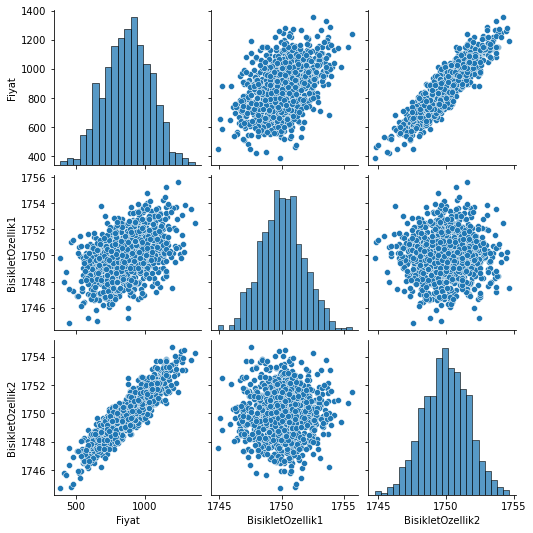

In [229]:
## plotting
sbn.pairplot(data)

In [230]:
## x and y
x = data.iloc[:, 1:3].values
#y = data.iloc[:, 0]
#y = data["Fiyat"].values
y = data.iloc[:, :1].values
# y = [0]
print(type(y))

<class 'numpy.ndarray'>


In [231]:
## test and train
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [232]:
x_train.shape

(700, 2)

In [233]:
x_test.shape

(300, 2)

In [234]:
y_train.shape

(700, 1)

In [235]:
y_true.shape

(300, 1)

In [236]:
## scale
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_train

array([[0.49296045, 0.73833238],
       [0.50913352, 0.51611437],
       [0.80182613, 0.34119246],
       ...,
       [0.87420048, 0.51346243],
       [0.82203674, 0.62339064],
       [0.68409997, 0.46661396]])

In [237]:
x_test = scale.fit_transform(x_test)
x_test

array([[0.49197776, 0.59452833],
       [0.36812184, 0.73777861],
       [0.82355325, 0.41843383],
       [0.51442345, 0.59168979],
       [0.76550399, 0.52986849],
       [0.49651411, 0.6688142 ],
       [0.36332193, 0.77189768],
       [0.6464676 , 0.52531058],
       [0.49463332, 0.63331352],
       [0.67840655, 0.69382917],
       [0.40828889, 0.61472569],
       [0.27889598, 0.93781869],
       [0.28099689, 0.50382337],
       [0.34456986, 0.31961973],
       [0.40781019, 0.41220642],
       [0.80476443, 0.56102032],
       [0.29092164, 0.34270145],
       [0.76049384, 0.62467489],
       [0.35933882, 0.58699046],
       [0.63785739, 0.50196389],
       [0.48967509, 0.18809996],
       [0.6028654 , 0.71429873],
       [0.26649734, 0.77357331],
       [0.3698872 , 0.54751474],
       [0.3581219 , 0.98283303],
       [0.96774961, 0.65811417],
       [0.30594361, 0.9708335 ],
       [0.36728459, 0.54385686],
       [0.4567254 , 0.42083913],
       [0.28326261, 0.77635013],
       [0.

In [238]:
## layers
model = Sequential()

## hidden layers
model.add(Dense(5, activation = "relu"))  ## 5 neurons
model.add(Dense(5, activation = "relu"))
model.add(Dense(5, activation = "sigmoid"))
model.add(Dense(5, activation = "sigmoid"))
model.add(Dense(5, activation = "relu"))

## output layer
model.add(Dense(1))

model.compile(optimizer = "rmsprop", loss = "mse")

In [239]:
## fit model
model.fit(x_train, y_train, epochs = 600) ## epoch değişebilir.

Epoch 1/600
22/22 [==============================] - 1s 855us/step - loss: 788100.1875
Epoch 2/600
22/22 [==============================] - 0s 807us/step - loss: 787745.0000
Epoch 3/600
22/22 [==============================] - 0s 807us/step - loss: 787421.0625
Epoch 4/600
22/22 [==============================] - 0s 807us/step - loss: 787088.3750
Epoch 5/600
22/22 [==============================] - 0s 760us/step - loss: 786743.7500
Epoch 6/600
22/22 [==============================] - 0s 760us/step - loss: 786428.0625
Epoch 7/600
22/22 [==============================] - 0s 760us/step - loss: 786138.5000
Epoch 8/600
22/22 [==============================] - 0s 855us/step - loss: 785832.6250
Epoch 9/600
22/22 [==============================] - 0s 760us/step - loss: 785512.4375
Epoch 10/600
22/22 [==============================] - 0s 760us/step - loss: 785179.4375
Epoch 11/600
22/22 [==============================] - 0s 781us/step - loss: 784835.5625
Epoch 12/600
22/22 [=====================

22/22 [==============================] - 0s 807us/step - loss: 723531.1250
Epoch 95/600
22/22 [==============================] - 0s 760us/step - loss: 722402.4375
Epoch 96/600
22/22 [==============================] - 0s 760us/step - loss: 721265.8125
Epoch 97/600
22/22 [==============================] - 0s 807us/step - loss: 720122.0625
Epoch 98/600
22/22 [==============================] - 0s 760us/step - loss: 718968.3750
Epoch 99/600
22/22 [==============================] - 0s 807us/step - loss: 717806.5625
Epoch 100/600
22/22 [==============================] - 0s 855us/step - loss: 716636.9375
Epoch 101/600
22/22 [==============================] - 0s 760us/step - loss: 715456.7500
Epoch 102/600
22/22 [==============================] - 0s 807us/step - loss: 714266.5625
Epoch 103/600
22/22 [==============================] - 0s 807us/step - loss: 713072.0625
Epoch 104/600
22/22 [==============================] - 0s 760us/step - loss: 711864.6250
Epoch 105/600
22/22 [===================

22/22 [==============================] - 0s 855us/step - loss: 586794.6250
Epoch 187/600
22/22 [==============================] - 0s 807us/step - loss: 584992.4375
Epoch 188/600
22/22 [==============================] - 0s 807us/step - loss: 583179.0000
Epoch 189/600
22/22 [==============================] - 0s 807us/step - loss: 581362.5625
Epoch 190/600
22/22 [==============================] - 0s 807us/step - loss: 579543.3750
Epoch 191/600
22/22 [==============================] - 0s 855us/step - loss: 577709.4375
Epoch 192/600
22/22 [==============================] - 0s 807us/step - loss: 575872.6250
Epoch 193/600
22/22 [==============================] - 0s 807us/step - loss: 574030.3750
Epoch 194/600
22/22 [==============================] - 0s 807us/step - loss: 572188.8125
Epoch 195/600
22/22 [==============================] - 0s 855us/step - loss: 570334.5625
Epoch 196/600
22/22 [==============================] - 0s 760us/step - loss: 568477.5625
Epoch 197/600
22/22 [==============

22/22 [==============================] - 0s 760us/step - loss: 402483.9375
Epoch 279/600
22/22 [==============================] - 0s 807us/step - loss: 400355.6562
Epoch 280/600
22/22 [==============================] - 0s 760us/step - loss: 398228.8125
Epoch 281/600
22/22 [==============================] - 0s 884us/step - loss: 396100.6562
Epoch 282/600
22/22 [==============================] - 0s 807us/step - loss: 393959.0312
Epoch 283/600
22/22 [==============================] - 0s 760us/step - loss: 391822.5312
Epoch 284/600
22/22 [==============================] - 0s 760us/step - loss: 389690.9688
Epoch 285/600
22/22 [==============================] - 0s 807us/step - loss: 387556.9375
Epoch 286/600
22/22 [==============================] - 0s 807us/step - loss: 385416.3125
Epoch 287/600
22/22 [==============================] - 0s 807us/step - loss: 383285.7812
Epoch 288/600
22/22 [==============================] - 0s 807us/step - loss: 381153.5000
Epoch 289/600
22/22 [==============

22/22 [==============================] - 0s 760us/step - loss: 210649.3438
Epoch 371/600
22/22 [==============================] - 0s 807us/step - loss: 208705.4844
Epoch 372/600
22/22 [==============================] - 0s 760us/step - loss: 206773.6406
Epoch 373/600
22/22 [==============================] - 0s 995us/step - loss: 204840.2031
Epoch 374/600
22/22 [==============================] - 0s 760us/step - loss: 202919.2031
Epoch 375/600
22/22 [==============================] - 0s 807us/step - loss: 201011.4531
Epoch 376/600
22/22 [==============================] - 0s 760us/step - loss: 199097.4844
Epoch 377/600
22/22 [==============================] - 0s 760us/step - loss: 197197.0000
Epoch 378/600
22/22 [==============================] - 0s 760us/step - loss: 195296.4062
Epoch 379/600
22/22 [==============================] - 0s 807us/step - loss: 193412.0156
Epoch 380/600
22/22 [==============================] - 0s 807us/step - loss: 191507.1562
Epoch 381/600
22/22 [==============

22/22 [==============================] - 0s 760us/step - loss: 65618.2422
Epoch 463/600
22/22 [==============================] - 0s 807us/step - loss: 64548.0273
Epoch 464/600
22/22 [==============================] - 0s 807us/step - loss: 63477.6016
Epoch 465/600
22/22 [==============================] - 0s 807us/step - loss: 62425.5156
Epoch 466/600
22/22 [==============================] - 0s 760us/step - loss: 61387.2227
Epoch 467/600
22/22 [==============================] - 0s 807us/step - loss: 60356.7422
Epoch 468/600
22/22 [==============================] - 0s 855us/step - loss: 59346.9102
Epoch 469/600
22/22 [==============================] - 0s 977us/step - loss: 58341.7812
Epoch 470/600
22/22 [==============================] - 0s 828us/step - loss: 57359.3672
Epoch 471/600
22/22 [==============================] - 0s 760us/step - loss: 56395.6875
Epoch 472/600
22/22 [==============================] - 0s 807us/step - loss: 55458.3125
Epoch 473/600
22/22 [=========================

22/22 [==============================] - 0s 807us/step - loss: 26803.4980
Epoch 556/600
22/22 [==============================] - 0s 807us/step - loss: 26801.9023
Epoch 557/600
22/22 [==============================] - 0s 807us/step - loss: 26802.2480
Epoch 558/600
22/22 [==============================] - 0s 807us/step - loss: 26800.0723
Epoch 559/600
22/22 [==============================] - 0s 760us/step - loss: 26802.1035
Epoch 560/600
22/22 [==============================] - 0s 807us/step - loss: 26801.6172
Epoch 561/600
22/22 [==============================] - 0s 855us/step - loss: 26800.8086
Epoch 562/600
22/22 [==============================] - 0s 807us/step - loss: 26800.6543
Epoch 563/600
22/22 [==============================] - 0s 760us/step - loss: 26800.2227
Epoch 564/600
22/22 [==============================] - 0s 807us/step - loss: 26800.5000
Epoch 565/600
22/22 [==============================] - 0s 807us/step - loss: 26802.3105
Epoch 566/600
22/22 [=========================

<AxesSubplot:>

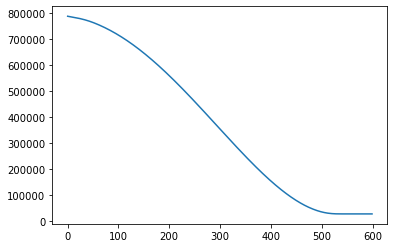

In [240]:
## loss
loss = model.history.history["loss"]
sbn.lineplot(x = range(len(loss)), y = loss)

In [241]:
loss_train = model.evaluate(x_train, y_train, verbose = 0)
loss_test = model.evaluate(x_test, y_true, verbose = 0)

In [242]:
loss_train

26796.970703125

In [243]:
loss_test

27173.462890625

In [244]:
test_pred = model.predict(x_test)

10/10 [==============================] - 0s 776us/step


In [245]:
test_pred

array([[872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],
       [872.63055],


In [246]:
y_true_df = pd.DataFrame(y_true, columns = ["Real Y"])
y_true_df

,Real Y
0,907.123253
1,965.387674
2,894.891739
3,906.723796
4,958.342076
...,...
295,752.351973
296,705.802257
297,1009.292244
298,1057.193657


In [247]:
test_pred = pd.Series(test_pred.reshape(300,))
test_pred

0      872.630554
1      872.630554
2      872.630554
3      872.630554
4      872.630554
          ...    
295    872.630554
296    872.630554
297    872.630554
298    872.630554
299    872.630554
Length: 300, dtype: float32

In [248]:
Final_df = pd.concat([y_true_df, test_pred], axis = 1)
Final_df.columns = ["Real Y", "Y Pred"]
Final_df

,Real Y,Y Pred
0,907.123253,872.630554
1,965.387674,872.630554
2,894.891739,872.630554
3,906.723796,872.630554
4,958.342076,872.630554
...,...,...
295,752.351973,872.630554
296,705.802257,872.630554
297,1009.292244,872.630554
298,1057.193657,872.630554


<AxesSubplot:xlabel='Real Y', ylabel='Y Pred'>

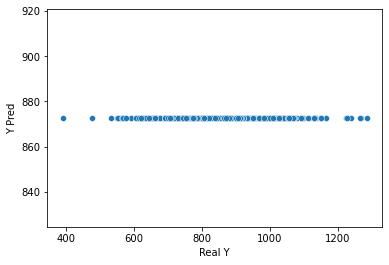

In [262]:
sbn.scatterplot(x = "Real Y", y = "Y Pred", data = Final_df) ## neden bozuldugunu bulamadım.

In [250]:
## scores
Y_true = Final_df["Real Y"].values
Y_pred = Final_df["Y Pred"].values
#Y_true

In [251]:
## score
#acc = accuracy_score(Y_true, Y_pred) >> for classification
abs_error = mean_absolute_error(Y_true, Y_pred)
sqrd_error = mean_squared_error(Y_true, Y_pred)

In [252]:
abs_error

134.90842593604165

In [253]:
sqrd_error

27173.465364790703

In [254]:
data.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [255]:
## test model
test_model = [[1750, 1750]]
test_model = scale.transform(test_model)
model.predict(test_model)  ## 810 falan olmmsı lazımdı.(897, 903)
## relu yerine sigmoid kullanoılabilir.

1/1 [==============================] - 0s 13ms/step


array([[872.63055]], dtype=float32)

In [259]:
## save model
model.save("bisiklet.h5")

In [261]:
## call the model
new_model = load_model("bisiklet.h5")
new_test = scale.transform([[1751, 1752]])
new_model.predict(new_test)

1/1 [==============================] - 0s 51ms/step


array([[872.63055]], dtype=float32)